### Linear Regression Solving, listing 3.2 (Adapted, with `compat.v1`)

In [54]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [55]:
tf_version = tf.__version__
print("TensorFlow", tf_version)

TensorFlow 2.0.0


In [56]:
learning_rate = 0.01
training_epochs = 100

In [57]:
x_train = np.linspace(-1, 1, 201)
y_train = 2 * x_train + np.random.randn(*x_train.shape) * 0.33

In [58]:
tf.compat.v1.disable_eager_execution() # Argh! Otherwise, TF 2.0 barfs.

X = tf.compat.v1.placeholder(tf.float32)
Y = tf.compat.v1.placeholder(tf.float32)

In [59]:
def model(W, w):
    return tf.multiply(X, w)

In [60]:
w = tf.Variable(0.0, name="weights")

In [61]:
y_model = model(X, w)
cost = tf.square(Y - y_model)

In [62]:
train_op = tf.compat.v1.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [63]:
sess = tf.compat.v1.Session()
init = tf.compat.v1.global_variables_initializer()
sess.run(init)

In [64]:
for epoch in range(training_epochs):
    for (x, y) in zip(x_train, y_train):
        sess.run(train_op, feed_dict={X: x, Y: y})

In [65]:
w_val = sess.run(w)

In [66]:
sess.close()

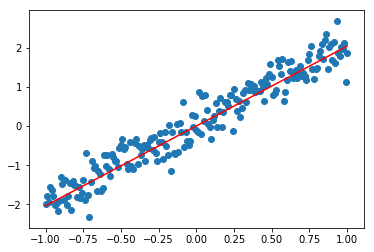

In [67]:
plt.scatter(x_train, y_train)
y_learned = x_train * w_val
plt.plot(x_train, y_learned, 'r')
plt.show()

Done!